# Linear LFM

Replication of the paper by [Lawrence et al., 2006.](https://papers.nips.cc/paper/3119-modelling-transcriptional-regulation-using-gaussian-processes.pdf)

The dataset required is small and is available preprocessed here:
- https://drive.google.com/drive/folders/1Tg_3SlKbdv0pDog6k2ys0J79e1-vgRyd?usp=sharing

### Probesets

The original paper restricted their interest to 5 known targets of p53:

| Target       | Probeset     | Aliases    |
| :------------- | :----------: | :----------- |
| DDB2 |  203409_at    | |
| p21   | 202284_s_at | p21CIP1, CDKN1A |
| SESN1/hPA26   | 218346_s_at |  |
| BIK   | 205780_at |  |
| TNFRSF10b   | 209294_x_at, 209295_at, 210405_x_at |  |

In [3]:
import torch

from lafomo.exact import AnalyticalLFM, Trainer
from lafomo.datasets import P53Data
from lafomo.plot import Plotter


In [4]:
dataset = P53Data(replicate=0)
model = AnalyticalLFM(dataset, dataset.variance.reshape(-1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = Trainer(model, optimizer)
plotter = Plotter(model, dataset.gene_names)

In [5]:
trainer.train(epochs=100)

Iter 1/100 - Loss: 1.828   lengthscale: 1.414   noise: 0.693
Iter 11/100 - Loss: 1.686   lengthscale: 1.012   noise: 0.316
Iter 21/100 - Loss: 1.543   lengthscale: 0.756   noise: 0.140
Iter 31/100 - Loss: 1.375   lengthscale: 0.650   noise: 0.068
Iter 41/100 - Loss: 1.154   lengthscale: 0.697   noise: 0.036
Iter 51/100 - Loss: 0.932   lengthscale: 0.990   noise: 0.019
Iter 61/100 - Loss: 0.780   lengthscale: 1.704   noise: 0.010
Iter 71/100 - Loss: 0.714   lengthscale: 2.201   noise: 0.006
Iter 81/100 - Loss: 0.688   lengthscale: 2.292   noise: 0.004
Iter 91/100 - Loss: 0.677   lengthscale: 2.278   noise: 0.003


C:\Users\Jacob\Documents\proj\reggae\lafomo\plot\plotter.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


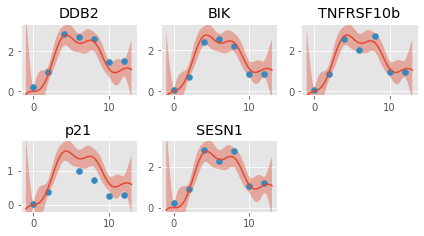

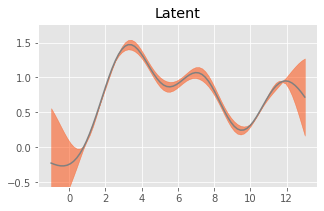

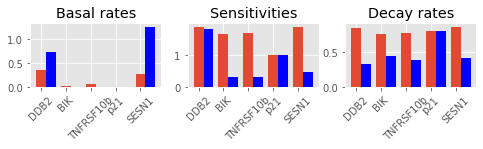

In [4]:
t_predict = torch.linspace(-1, 13, 80, dtype=torch.float64)

plotter.plot_outputs(t_predict, t_scatter=dataset.t_observed, y_scatter=dataset.m_observed)

plotter.plot_latents(t_predict, num_samples=0)

plotter.plot_kinetics()

(-0.5, 34.5, 34.5, -0.5)

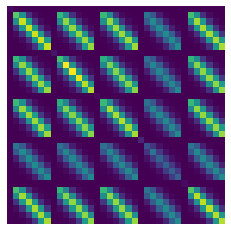

In [13]:
Kxx = model.covar_module(model.train_t, model.train_t).evaluate()
plt.imshow(Kxx.detach())
plt.axis('off')
